<a href="https://colab.research.google.com/github/halen48/image-processing/blob/main/CNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Este notebook apresentará conceitos básicos sobre redes convolucionais

<img src="https://editor.analyticsvidhya.com/uploads/59954intro%20to%20CNN.JPG"/>

Como pode ser observado, existem 2 camadas principais em uma rede neural convolucional como um todo (esquerda para a direita): 
* Mapas de caracteristicas [encarregados pela extrassão de características];
* Camadas Completamente Conectadas [engarregadas pela Classificação e Distribuição Probabilística].

Neste notebook, vamos abordar cada parte da rede de trás pra frente, isto é, da direta para a esquerda

#Camadas completamente conectadas (Fully connected layers)

Quando tempos um problema de <b>classificação</b>, é comum utilizar-mos redes neurais simples, isto é, **redes compostas por camadas completamente conectadas**. Assim, trago um exemplo simples de classificação de dados **(não imagens!!)**

##Download do conjunto de dados (*dataset*) que iremos classificar


```wget``` é um comando nativo do linux para fazer downlods de arquivos. Como o colab roda em cima de um sistema linux, você pode executar os comandos nativos do linux começando com o caracter !. Assim:
```
!wget <URL> -O <nome do arquivo>
```
onde:
* URL: A url que contem o arquivo de download;
* -O <nome do arquivo>: renomeia o arquivo baixado para <nome do arquivo> (optativo)
* -q: Executa esse comando sem mostrar a barra de download (optativo)

In [222]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip -O dataset.zip
!unzip dataset.zip

--2022-08-27 01:39:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   4.52M  8.24MB/s    in 0.5s    

2022-08-27 01:39:08 (8.24 MB/s) - ‘dataset.zip’ saved [4738776/4738776]

Archive:  dataset.zip
replace DryBeanDataset/Dry_Bean_Dataset.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


##Explorando o *dataset*

In [223]:
#Dependências
import pandas as pd
from sklearn.utils import shuffle

In [224]:
#Conteudo do dataset
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
print("O tipo da variável df é:",type(df))

O tipo da variável df é: <class 'pandas.core.frame.DataFrame'>


In [225]:
#@title Tabela com os dados
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


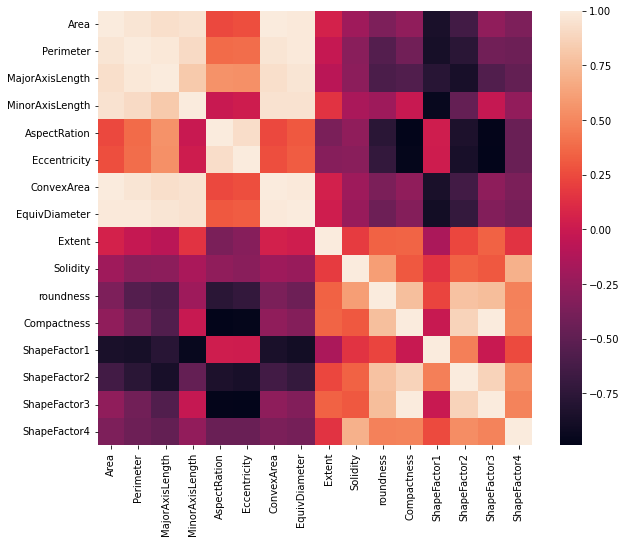

In [226]:
#@title Correlação dos dados

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, square=True, ax=ax)

In [227]:
#Vamos embaralhar o dataset
df = shuffle(df)

features = df.columns.values[:-1]
classes = df['Class']

rotulos_distintos = list(set(classes.to_list()))

rotulo_numero = [rotulos_distintos.index(classe) for classe in classes]
rotulo_vetor = [( [ 1. if rotulos_distintos.index(classe) == i else 0 for i in range(0,len(rotulos_distintos)) ] ) for classe in classes]

n_classes = len(rotulos_distintos)
print("Número de rótulos: %d - "%n_classes,rotulos_distintos)
entradas = df[features]

#Normaliza: transforma os números entre 0~1
for feature in features:
  entradas[feature] = (entradas[feature]-entradas[feature].min())/(entradas[feature].max()-entradas[feature].min())

n_entradas = entradas.shape[0]
#Observação: Entradas = Entries, não confundir com Inputs!!
print("Número de entradas: %d"%n_entradas)

Número de rótulos: 7 -  ['CALI', 'SEKER', 'SIRA', 'BOMBAY', 'DERMASON', 'BARBUNYA', 'HOROZ']
Número de entradas: 13611


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##Organizando o *dataset* para o algoritmo

Sempre dividimos o nosso conjunto de dados para treino e teste (e muitas vezes dividimos parte do teste como validação). Neste exemplo, iremos apenas nos preocupar com o *dataset* de treino e de teste.

In [228]:
quantidade_treino = 0.7 #@param {type:"slider", min:0, max:0.9, step:0.1}

In [229]:
#Dependência
import tensorflow as tf

In [230]:
qt_treino = int(n_entradas * quantidade_treino)
qt_teste = n_entradas - qt_treino
print("Treino: %d | Teste: %d"%(qt_treino, qt_teste))

#Converte todas as classes em vetores
dataset_treino,label_treino = tf.convert_to_tensor(entradas[:qt_treino]), tf.convert_to_tensor(rotulo_vetor[:qt_treino],dtype='float64')
dataset_teste,label_teste = tf.convert_to_tensor(entradas[qt_treino:]), tf.convert_to_tensor(rotulo_vetor[qt_treino:],dtype='float64')

Treino: 9527 | Teste: 4084


##MLP (Multi Layer Perceptron)

*Multi Layer Perceptron* é um tipo de rede com **camadas completamente conectadas**, isto é, todos os neurônios da camada atual estão conectados com o da proxima camada e da camada anterior.

In [231]:
#Dependências
from tensorflow import keras
from keras import models, layers

In [232]:
# Tamanho da entrada
input_shape = (len(features),)
print('Tamanho da entrada: %d'%input_shape)

# Categorias a serem classificadas
print("Número de rótulos (categorias/classes): %d - "%n_classes,rotulos_distintos)

Tamanho da entrada: 16
Número de rótulos (categorias/classes): 7 -  ['CALI', 'SEKER', 'SIRA', 'BOMBAY', 'DERMASON', 'BARBUNYA', 'HOROZ']


###Declaração da rede MLP
Existem <a href="https://keras.io/guides/sequential_model/">várias formas</a> de sintaxe para definir um modelo em keras

In [233]:
def mlp_sintaxe1(input_shape, output_classes, ativacao = 'softmax'):
  model = keras.Sequential()
  model.add(layers.Dense(350, input_shape=input_shape, activation='relu'))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dense(output_classes, activation=ativacao))
  return model

In [234]:
def mlp_sintaxe2(input_shape, output_classes, ativacao = 'softmax'):
  return keras.Sequential([
    layers.Dense(150, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(output_classes, activation=ativacao),
  ])

###Detalhes do modelo criado

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 350)               5950      
                                                                 
 dense_43 (Dense)            (None, 50)                17550     
                                                                 
 dense_44 (Dense)            (None, 7)                 357       
                                                                 
Total params: 23,857
Trainable params: 23,857
Non-trainable params: 0
_________________________________________________________________


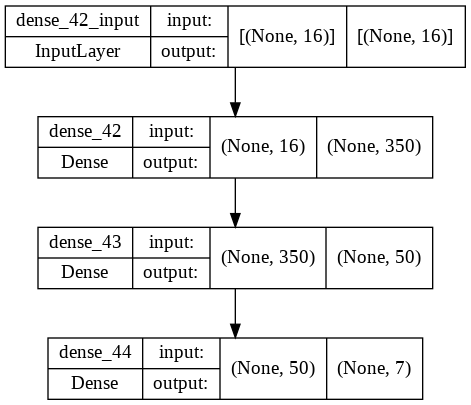

In [235]:
model = mlp_sintaxe1(input_shape, n_classes)
model.summary()
keras.utils.plot_model(model, show_shapes=True)

##Treina o modelo

Vamos treinar o modelo com 50 épocas (ou seja, todos os dados serão passados pelo modelo 50x), e 250 batchs (ou seja, serão passados 250 dados para o modelo antes dele realizar uma atualização em seus pesos). Isolamos 20% dos dados de treinamento (ou seja, eles não serão usado para treinar o modelo) para validação.

In [236]:
# Treina
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision()])
history = model.fit(dataset_treino, label_treino, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/50
31/31 [==============================] - 1s 12ms/step - loss: 0.1090 - accuracy: 0.3551 - precision_11: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.5147 - val_precision_11: 1.0000
Epoch 2/50
31/31 [==============================] - 0s 5ms/step - loss: 0.0751 - accuracy: 0.6352 - precision_11: 0.9861 - val_loss: 0.0566 - val_accuracy: 0.8017 - val_precision_11: 0.9717
Epoch 3/50
31/31 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.8272 - precision_11: 0.9579 - val_loss: 0.0383 - val_accuracy: 0.8599 - val_precision_11: 0.9450
Epoch 4/50
31/31 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8725 - precision_11: 0.9303 - val_loss: 0.0297 - val_accuracy: 0.8820 - val_precision_11: 0.9195
Epoch 5/50
31/31 [==============================] - 0s 5ms/step - loss: 0.0274 - accuracy: 0.8881 - precision_11: 0.9157 - val_loss: 0.0266 - val_accuracy: 0.8788 - val_precision_11: 0.9023
Epoch 6/50
31/31 [==============================]

##Avalia o modelo

In [237]:
# Testa
test_results = model.evaluate(dataset_teste, label_teste, verbose=1)
print('Resultado - Loss: %d - Accuracy: %.6f%% - Precision: %.6f%%'%(test_results[0],100*test_results[1],100*test_results[2]))

128/128 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9123 - precision_11: 0.9192
Resultado - Loss: 0 - Accuracy: 91.234082% - Precision: 91.923457%


#Mapas de Caracteristicas (Feature Maps)

Como as entradas de uma rede neural simples **devem ser um vetor de tamanho fixo**, se o nosso objetivo é classificar uma imagem (ou seja, uma matriz de duas dimensões, isto é, classificar vetor de vetores), é necessário "achatar" esta matríz de forma que ela se transforme em um vetor.<br>

Se simplesmente utilizarmos a função ```flatten``` da biblioteca numpy, isso não trará bons resultados, pois perderemos informações espaciais.



In [238]:
#Dependências básicas
import numpy as np
from PIL import Image, ImageOps
import cv2

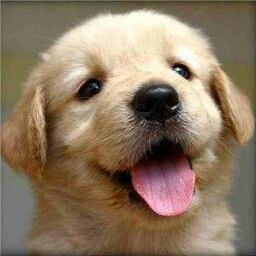

In [239]:
#Download de imagem
!wget https://i.pinimg.com/474x/32/0d/d4/320dd455e4d9b9179a0da092fbcd2c13--cute-little-puppies-cute-puppies.jpg -O imagem.jpg -q
img = Image.open("imagem.jpg")
img

In [240]:
#Fazendo "flatten" em uma imagem

tamanho_pixel = 1
flatten_img = np.array(img)
#Shape da imagem atual
print("Dimensão Original:",flatten_img.shape)
#faz o achatamento para cada canal de forma separada
flatten_img = np.array([flatten_img[:,:,canal].reshape((tamanho_pixel,flatten_img[:,:,canal].size//tamanho_pixel)) for canal in range(3)])
#a imagem está com seus eixos trocados
flatten_img = np.moveaxis(flatten_img,0,-1)
#Shape da imagem atual
print("Dimensão Pós Flatten:", flatten_img.shape)

#vamos esticar um pouco a imagem para melhor visualização
meio_imagem = flatten_img.shape[1]//2
flatten_img = cv2.resize(flatten_img[:,meio_imagem:meio_imagem+3000,:], dsize = None, fx = 20, fy = 20, interpolation = cv2.INTER_NEAREST)

img_flatten = Image.fromarray(flatten_img)
img_flatten.save("flatten_img.jpg")
img_flatten

Dimensão Original: (256, 256, 3)
Dimensão Pós Flatten: (1, 65536, 3)


Assim, uma alternativa para a extrassão de caracteristicas em que a **informação espacial é relevante** (ou seja, matrizes 2D), é a utilização de **convoluções**.

##O que é convolução?

<img src="https://upload.wikimedia.org/wikipedia/commons/0/06/Convolution_arithmetic_-_Full_padding_no_strides.gif"/>

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_17A-ConvolutionalNeuralNetworks-WHITEBG.png"/>

##Como funciona Max Pooling?

<img src="https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max.png"/>

##Definição do Modelo

In [241]:
#@title Parametros do modelo
dimensao_entrada = (32,32,3) #@param
tamanho_janela = (3,3) #@param

###Declaração da rede convolucional

In [242]:
#Dependências
from keras import models, layers

In [243]:
import math
def cnn_top_sintaxe1(input_shape, tamanho_janela):
  model = models.Sequential()
  model.add(layers.Conv2D(16, tamanho_janela, activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D((2, 2))) #Faz as dimensões da entrada reduzir pela metade

  # Observação: Não é aconselhado utilizar o comando [for] ao declarar camadas em redes
  # por conta de problemas de desempenho (fica mais lento)

  # Quero que minha camada de extrassão de caracteristicas reduza 
  # o máximo possível os valores de entrada
  for i in range(int(math.log2(input_shape[0]//2))-2):
    model.add(layers.Conv2D(16*(i+1), tamanho_janela, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
  return model

In [244]:
def cnn_top_sintaxe2(input_shape, tamanho_janela):
  
  camadas = []

  for i in range(int(math.log2(input_shape[0]//2))-2):
    camadas.append(layers.MaxPooling2D((2, 2)))
    camadas.append(layers.Conv2D(16*(i+1), tamanho_janela, activation='relu'))
      
  
  model = keras.Sequential(
    [
      layers.Conv2D(16, tamanho_janela, activation='relu', input_shape=input_shape),
      layers.MaxPooling2D((2, 2)),
    ] + camadas
  )
  
  return model

###Detalhes do modelo criado

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_159 (Conv2D)         (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_143 (MaxPooli  (None, 15, 15, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_160 (Conv2D)         (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 6, 6, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_161 (Conv2D)         (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 2, 2, 32)       

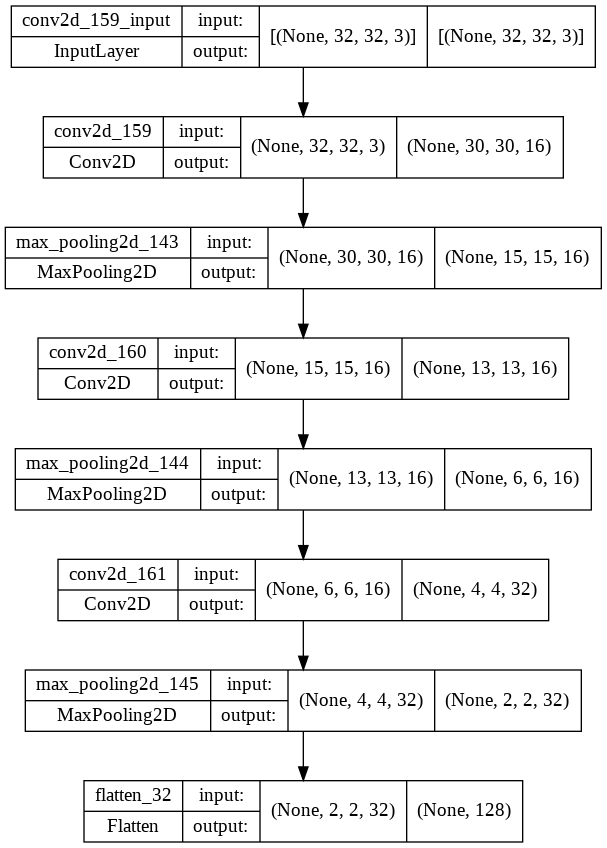

In [245]:
model = cnn_top_sintaxe1(dimensao_entrada, tamanho_janela)
#Vamos adicionar o layer flatten e ver 0o que acontece com o nosso modelo...
model.add(layers.Flatten())
model.summary()
keras.utils.plot_model(model, show_shapes=True)

#Dataset para classificar imagens
<a href="https://www.tensorflow.org/datasets/catalog/cats_vs_dogs">Cats vs Dogs</a>

In [246]:
#@title Parametros do modelo
epochs = 30 #@param
dimensao_entrada = (150,150,3) #@param
tamanho_janela = (3,3) #@param

In [247]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2022-08-27 01:39:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.112, 142.251.163.128, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   239MB/s    in 0.3s    

2022-08-27 01:39:57 (239 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [248]:
train_dir = "/content/cats_and_dogs_filtered/train"
teste_dir = "/content/cats_and_dogs_filtered/validation"

In [249]:
#Quantidade de imagens simultaneas que serão treinadas na nossa rede
tamanho_batch = 200

In [250]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Os pixeis precisam estar com valores entre 0~1, e não 0~255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) #20% do dataset de treino será isolado para validação
test_datagen = ImageDataGenerator(rescale=1./255)

# Dataset de Treino
dataset_treino = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(dimensao_entrada[0],dimensao_entrada[1]), #Ajusta todas as imagens para um tamanho fixo
        batch_size=tamanho_batch,
        subset='training',
        # (Gato = 0, Não Gato (Cachorro) = 1)
        class_mode='binary')

dataset_validacao = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(dimensao_entrada[0],dimensao_entrada[1]), #Ajusta todas as imagens para um tamanho fixo
    batch_size=tamanho_batch,
    class_mode='binary',
    subset='validation') 

# Dataset de teste
dataset_teste = test_datagen.flow_from_directory(
        teste_dir,
        target_size=(dimensao_entrada[0],dimensao_entrada[1]), #Ajusta todas as imagens para um tamanho fixo
        batch_size=tamanho_batch,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##Modelo para classificação

Assim, uma CNN é composta de uma camada de extração de features ligada à uma cadama de MLP.

In [251]:
#Número de classes = ( 0 = Gato; 1 = Cachorro )
n_classes = 1

# Faz o layer de Feature Extraction
model = cnn_top_sintaxe1(dimensao_entrada, tamanho_janela)
model.add(layers.Flatten())
# Faz o layer de MLP
# Observação: Como só temos uma única saída, nossa camada de ativação deve ser sigmoid,
# em vez de softmax, uma vez que softmax fará com que a única saida sempre apresente o valor [1]
mlp = mlp_sintaxe1((model.output.shape[1],), n_classes, ativacao = 'sigmoid')

#Coloca o MLP no final de Feature Extraction
for layer in mlp.layers:
  model.add(layer)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_162 (Conv2D)         (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_146 (MaxPooli  (None, 74, 74, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_163 (Conv2D)         (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_147 (MaxPooli  (None, 36, 36, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_164 (Conv2D)         (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 17, 17, 32)     

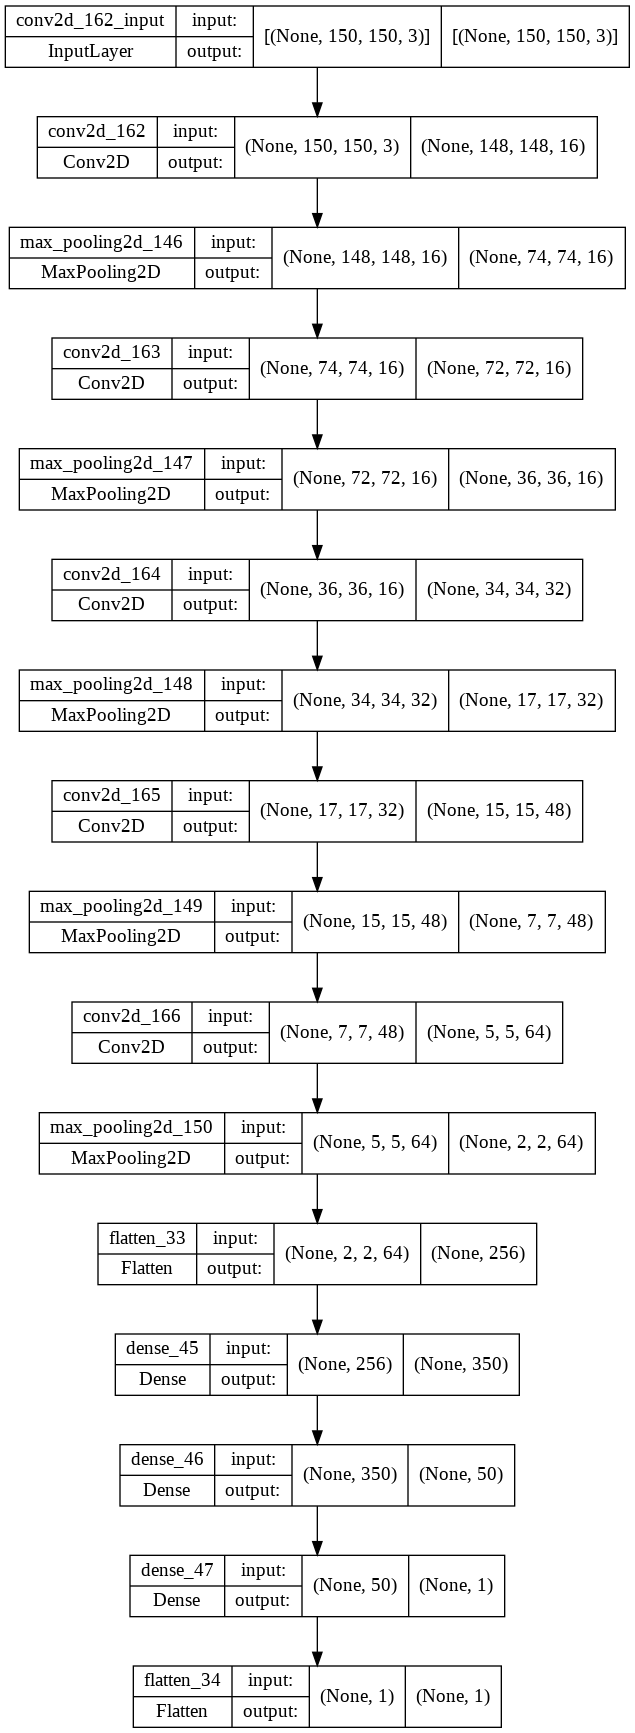

In [252]:
model.add(layers.Flatten())
model.summary()
keras.utils.plot_model(model, show_shapes=True)

###Compilando o Modelo para rodar

In [253]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy',tf.keras.metrics.Precision()])

##Treinando o modelo

In [254]:
history = model.fit(dataset_treino,epochs=epochs, validation_data=dataset_validacao, verbose=1)

Epoch 1/30
8/8 [==============================] - 7s 815ms/step - loss: 0.6940 - accuracy: 0.5013 - precision_12: 0.5009 - val_loss: 0.6923 - val_accuracy: 0.5000 - val_precision_12: 0.5000
Epoch 2/30
8/8 [==============================] - 5s 677ms/step - loss: 0.6926 - accuracy: 0.5025 - precision_12: 0.5014 - val_loss: 0.6914 - val_accuracy: 0.5025 - val_precision_12: 0.5013
Epoch 3/30
8/8 [==============================] - 5s 674ms/step - loss: 0.6883 - accuracy: 0.5356 - precision_12: 0.5190 - val_loss: 0.6858 - val_accuracy: 0.5575 - val_precision_12: 0.5339
Epoch 4/30
8/8 [==============================] - 5s 668ms/step - loss: 0.6807 - accuracy: 0.5612 - precision_12: 0.5510 - val_loss: 0.6773 - val_accuracy: 0.6050 - val_precision_12: 0.6265
Epoch 5/30
8/8 [==============================] - 5s 678ms/step - loss: 0.6605 - accuracy: 0.6219 - precision_12: 0.6032 - val_loss: 0.6632 - val_accuracy: 0.6000 - val_precision_12: 0.5746
Epoch 6/30
8/8 [==============================] - 

###Análise de desempenho do nosso modelo sobre as épocas

<Figure size 432x288 with 0 Axes>

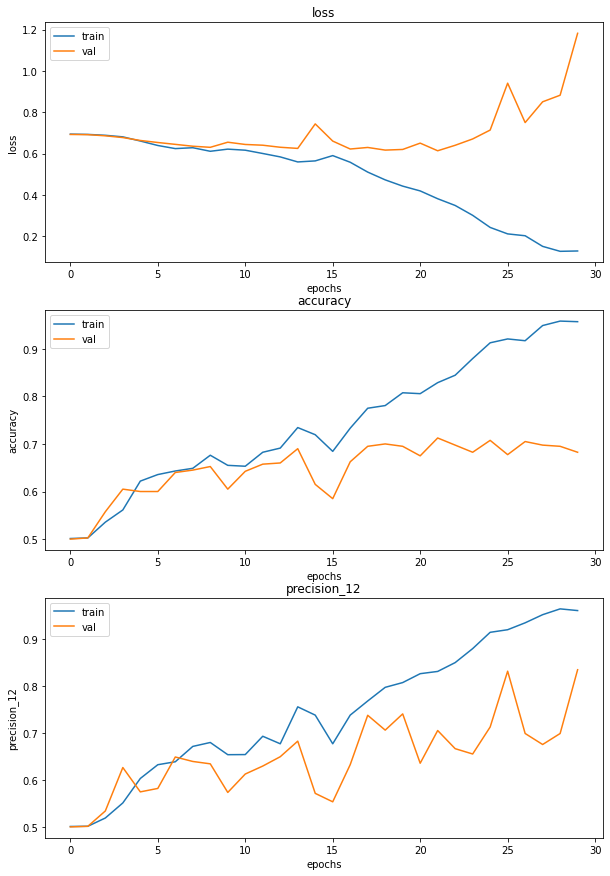

In [255]:
epochs = range(epochs)
todas_metricas = {chave:history.history[chave] for chave in history.history}
metricas = [it for it in todas_metricas.keys() if not 'val_' in it]
plt.figure()

fig, ax = plt.subplots(nrows = len(metricas), ncols= 1, figsize=(10, 5*len(metricas)))
ax = ax.ravel()

for i,chave in enumerate(metricas):
  ax[i].plot(todas_metricas[chave])
  ax[i].plot(todas_metricas['val_'+chave])
  ax[i].set_title("{}".format(chave))
  ax[i].set_xlabel("epochs")
  ax[i].set_ylabel(chave)
  ax[i].legend(["train", "val"])

##Avalia o modelo

In [256]:
# Testa
test_results = model.evaluate(dataset_teste, verbose=1)
print('Test results - Loss: %d - Accuracy: %.6f%% - Precision: %.6f%%'%(test_results[0],100*test_results[1],100*test_results[2]))


5/5 [==============================] - 3s 514ms/step - loss: 1.1932 - accuracy: 0.6390 - precision_12: 0.7683
Test results - Loss: 1 - Accuracy: 63.900000% - Precision: 76.833975%


###Avalia cada imagem separadamente

In [257]:
#Dependências
from google.colab.patches import cv2_imshow

É um Gato (Original: Gato)


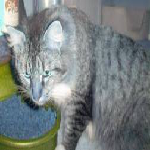

É um Gato (Original: Gato)


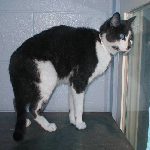

É um Gato (Original: Cachorro)


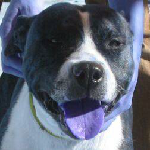

É um Cachorro (Original: Cachorro)


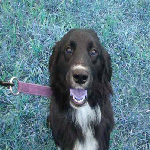

É um Gato (Original: Gato)


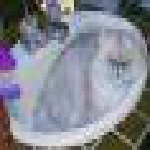

É um Cachorro (Original: Cachorro)


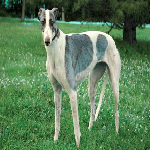

É um Gato (Original: Gato)


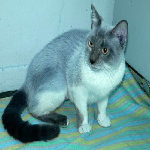

É um Gato (Original: Gato)


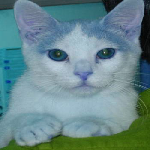

É um Gato (Original: Gato)


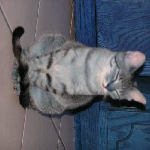

É um Cachorro (Original: Cachorro)


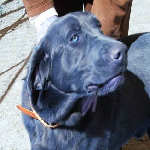

É um Gato (Original: Gato)


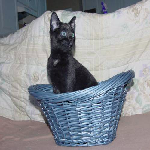

In [258]:
nome_label = ["Gato", "Cachorro"]
i = 0
for imgs, labels in (dataset_teste):
  for img,label in zip(imgs,labels):
    label = int(label)
    result = model.predict(np.expand_dims(img, 0))[0][0]
    if(result < 0.5): #Colocamos um limiar para a classe 0 e 1
      result = 0
    else:
      result = 1
    print("É um %s (Original: %s)"%(nome_label[result], nome_label[label]))
    cv2_imshow(img*255)
    i += 1
    if(i > 10):
      break
  if(i > 10):
    break